## IOT PROJECT: Stocks using LRE

### 1. Data Collection

In [13]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [14]:
df = pd.read_csv('GOOG.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-09-08,1533.510010,1563.864990,1528.010010,1532.390015,1532.390015,2610900
1,2020-09-09,1557.530029,1569.000000,1536.051025,1556.959961,1556.959961,1774700
2,2020-09-10,1560.640015,1584.081055,1525.805054,1532.020020,1532.020020,1618600
3,2020-09-11,1536.000000,1575.199951,1497.359985,1520.719971,1520.719971,1597100
4,2020-09-14,1539.005005,1564.000000,1515.739990,1519.280029,1519.280029,1696600


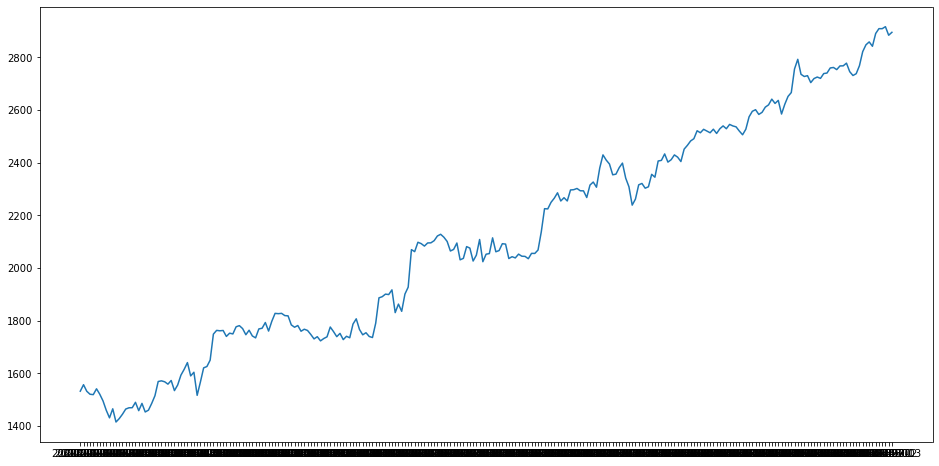

In [15]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

plt.figure(figsize=(16,8))
plt.plot(df['Date'],df['Close'])

In [16]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
del df['Date']
x_data = np.asanyarray(df[['Open']])
y_data = np.asanyarray(df[['Close']])

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,test_size=0.2)
df.head()
print(len(df))

251


In [19]:
lre = LinearRegression()
lre.fit(x_train,y_train)
y_preds = lre.predict(x_test)
print(y_preds[:5])
print(y_test[:5])

[[2108.17697695]
 [1461.82487053]
 [2102.24437341]
 [1766.18897969]
 [1735.27079515]]
[[2092.909912]
 [1458.420044]
 [2128.310059]
 [1746.780029]
 [1723.5     ]]


In [20]:
from sklearn.metrics import r2_score,mean_squared_error
print(f"R^2 Score: {r2_score(y_test,y_preds)}")
print(f"Mean Squared Error: {mean_squared_error(y_test,y_preds)}")

R^2 Score: 0.9968614630453854
Mean Squared Error: 542.4331952944124


In [21]:
price = float(input("Enter open price: "))
print(lre.predict(np.asanyarray(price).reshape(-1, 1)))

[[1732.83141078]]


Saving the model

In [26]:
import pickle
with open('lre-stocks-model.pickle', 'wb') as f:
    pickle.dump(lre, f)